In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions import *
import pandas as pd
from scipy import special

In [2]:
df = pd.read_csv('dados.csv')
df

,id,velocidade_x,velocidade_y,velocidade escalar,posicao_x,posicao_y,massa
0,0,13.085080,-1.728654,13.198771,0.000000,0.628182,0.001
1,1,-2.749922,97.325254,97.364095,6.250078,0.000000,0.001
2,2,-4.791490,72.709397,72.867104,4.051576,0.000000,0.001
3,3,18.206812,-2.828471,18.425207,0.000000,6.171529,0.001
4,4,34.407044,3.456792,34.580256,0.000000,6.913584,0.001
...,...,...,...,...,...,...,...
1995,1995,-54.729434,92.766714,107.707819,9.000000,0.000000,0.001
1996,1996,68.881993,17.046588,70.959954,0.000000,0.000000,0.001
1997,1997,-87.919803,-8.006490,88.283609,9.000000,0.993510,0.001
1998,1998,99.738802,-32.258637,104.825799,0.000000,9.000000,0.001


In [3]:
df = df.sort_values(by=['velocidade escalar'])
df

,id,velocidade_x,velocidade_y,velocidade escalar,posicao_x,posicao_y,massa
190,190,-3.692378,1.421085e-14,3.692378,9.000000,2.736868,0.001
14,14,4.634507,-1.100085e+00,4.763280,4.634507,4.599659,0.001
47,47,4.634507,2.357155e+00,5.199503,0.000000,2.357155,0.001
1994,1994,-5.576223,-3.143159e-01,5.585074,3.423777,7.742736,0.001
72,72,3.849425,4.556010e+00,5.964504,7.698850,4.556010,0.001
...,...,...,...,...,...,...,...
516,516,-99.750030,-9.999923e+01,141.244165,9.000000,9.000000,0.001
1144,1144,99.928876,9.983552e+01,141.254775,0.000000,0.000000,0.001
951,951,99.928876,9.989255e+01,141.295087,0.000000,0.000000,0.001
499,499,-99.972215,-9.999997e+01,141.401689,9.000000,9.000000,0.001


In [4]:
limites = limiteClasses(df['velocidade escalar'].values,sturges(df))
len(limites)
limites

[3.6923784513376248,
 8.793334465456539,
 13.894290479575453,
 18.995246493694367,
 24.09620250781328,
 29.197158521932195,
 34.29811453605111,
 39.39907055017002,
 44.50002656428894,
 49.60098257840785,
 54.701938592526766,
 59.80289460664568,
 64.9038506207646,
 70.00480663488352,
 75.10576264900244,
 80.20671866312136,
 85.30767467724029,
 90.4086306913592,
 95.50958670547813,
 100.61054271959705,
 105.71149873371597,
 110.81245474783489,
 115.91341076195381,
 121.01436677607273,
 126.11532279019166,
 131.21627880431058,
 136.31723481842948,
 141.4181908325484]

In [5]:
i = 0
frequencias = []
frequencia = 0
pontos_medios = []
ponto_medio = 0
limites_superior = []
for velocidade in df['velocidade escalar'].values:
    if velocidade < limites[i]:
        #print(f'valor da velocidade {velocidade}. Valor do limite {limites[i]}')
        frequencia += 1
    else:
        limites_superior.append(limites[i])
        frequencias.append(frequencia)
        frequencia = 0
        i += 1
limites_superior

[3.6923784513376248,
 8.793334465456539,
 13.894290479575453,
 18.995246493694367,
 24.09620250781328,
 29.197158521932195,
 34.29811453605111,
 39.39907055017002,
 44.50002656428894,
 49.60098257840785,
 54.701938592526766,
 59.80289460664568,
 64.9038506207646,
 70.00480663488352,
 75.10576264900244,
 80.20671866312136,
 85.30767467724029,
 90.4086306913592,
 95.50958670547813,
 100.61054271959705,
 105.71149873371597,
 110.81245474783489,
 115.91341076195381,
 121.01436677607273,
 126.11532279019166,
 131.21627880431058,
 136.31723481842948]

num_bins: 14


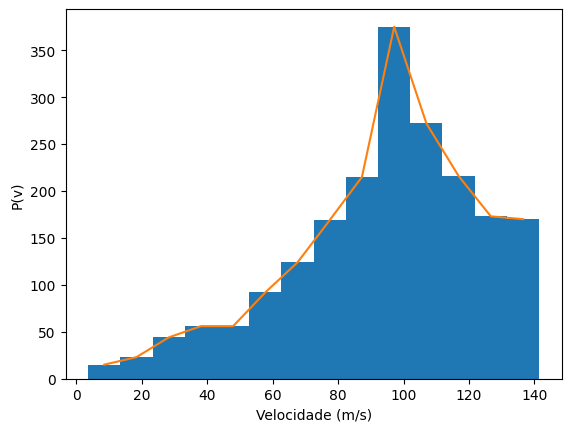

In [6]:
num_bins = int(np.ceil(len(limites)/2))
print(f'num_bins: {num_bins}')

fig, ax =plt.subplots()

n,bins,patches = ax.hist(df['velocidade escalar'],num_bins,density=False)

bin_centers = 0.5*(bins[1:]+bins[:-1])
# print(len(bins_centers))
# print(n)
plt.xlabel('Velocidade (m/s)')
plt.ylabel("P(v)")
ax.plot(bin_centers,n)


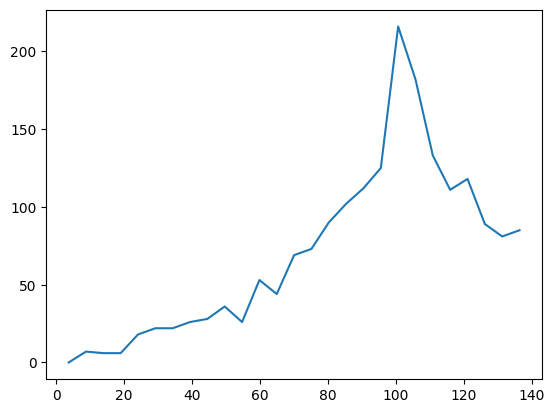

In [7]:
#grafico sem o linspace
plt.plot(limites_superior,frequencias)

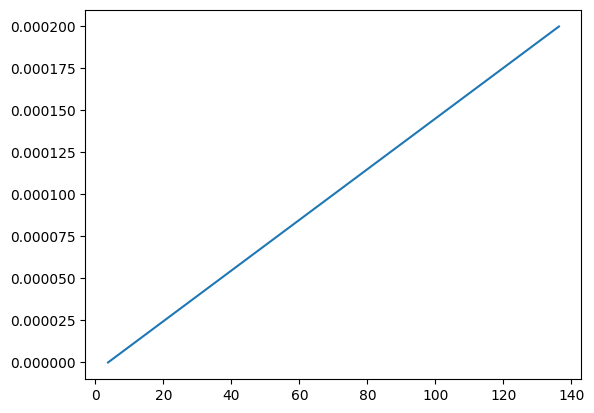

In [8]:
plt.plot(limites_superior,np.linspace(0,0.00020,27))

Valores teoricos da densidade de probabilidade

In [9]:
#valor teorico

probability_density = np.array([0])

a = np.mean(df['velocidade escalar'].values) * np.sqrt(np.pi/8)

for x in df['velocidade escalar'].values:
    y = np.sqrt(2/np.pi)*x* np.exp(-x**2/(2*np.mean(df['velocidade escalar'].values)**2))/a**3
    probability_density = np.append(probability_density,y)
probability_density = probability_density[1:]

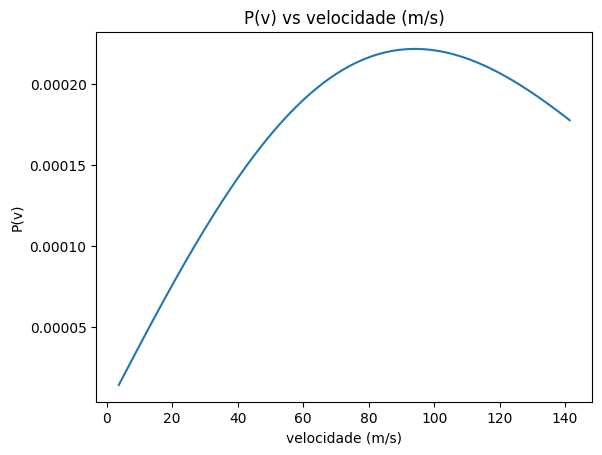

In [10]:
#gráfico com os valores teoricos

plt.title('P(v) vs velocidade (m/s)')
plt.ylabel('P(v)')
plt.xlabel('velocidade (m/s)')

plt.plot(df['velocidade escalar'].values,probability_density)

In [11]:
df = df.sort_values('velocidade escalar')
df


,id,velocidade_x,velocidade_y,velocidade escalar,posicao_x,posicao_y,massa
190,190,-3.692378,1.421085e-14,3.692378,9.000000,2.736868,0.001
14,14,4.634507,-1.100085e+00,4.763280,4.634507,4.599659,0.001
47,47,4.634507,2.357155e+00,5.199503,0.000000,2.357155,0.001
1994,1994,-5.576223,-3.143159e-01,5.585074,3.423777,7.742736,0.001
72,72,3.849425,4.556010e+00,5.964504,7.698850,4.556010,0.001
...,...,...,...,...,...,...,...
516,516,-99.750030,-9.999923e+01,141.244165,9.000000,9.000000,0.001
1144,1144,99.928876,9.983552e+01,141.254775,0.000000,0.000000,0.001
951,951,99.928876,9.989255e+01,141.295087,0.000000,0.000000,0.001
499,499,-99.972215,-9.999997e+01,141.401689,9.000000,9.000000,0.001


In [12]:
#calcula os valores teoricos 
valor_teorico = np.array([0])
a = np.mean(df['velocidade escalar'].values) * np.sqrt(np.pi/8)
for x in df['velocidade escalar'].values:
    y = special.erf(x/(np.sqrt(2)*a)) - np.sqrt(2/np.pi)*x* np.exp(-x**2/(2*np.mean(df['velocidade escalar'].values)**2))/a
    valor_teorico = np.append(valor_teorico,y)
valor_teorico = valor_teorico[1:]


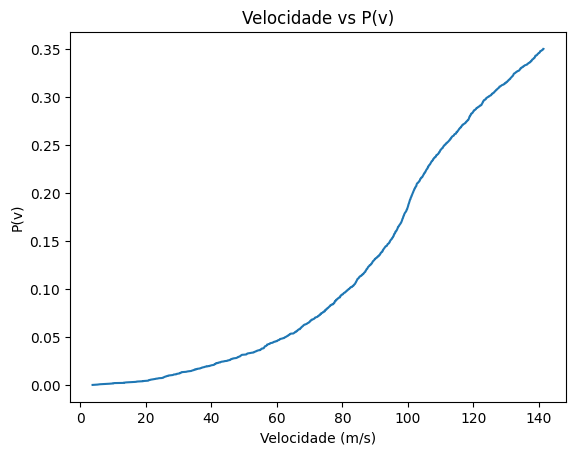

In [13]:
#gráfico com os valores encontrados
#forcei o linspace. Reescrever depois

num_particulas = (df['id']+1)/ len(df['id'])

plt.title('Velocidade vs P(v)')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('P(v)')
plt.plot(df['velocidade escalar'].values,np.linspace(0,0.35,2000))

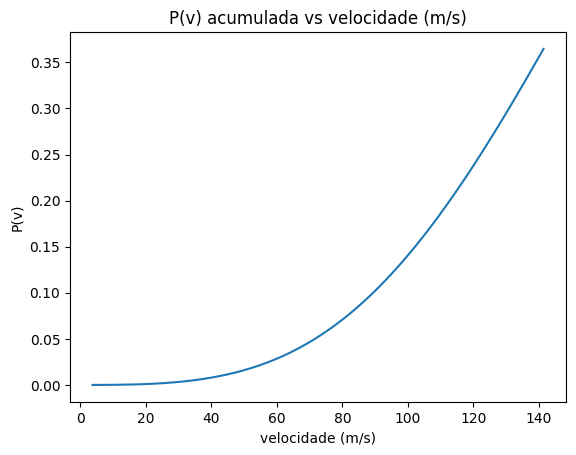

In [14]:
#gráfico com os valores teoricos

plt.title('P(v) acumulada vs velocidade (m/s)')
plt.ylabel('P(v)')
plt.xlabel('velocidade (m/s)')

plt.plot(df['velocidade escalar'].values,valor_teorico)

1) criar um dataframe para somente a velocidade escalar

In [15]:
velocidade_escalar = pd.DataFrame({'id': df['id'],'velocidade escalar': df['velocidade escalar']})
velocidade_escalar

,id,velocidade escalar
190,190,3.692378
14,14,4.763280
47,47,5.199503
1994,1994,5.585074
72,72,5.964504
...,...,...
516,516,141.244165
1144,1144,141.254775
951,951,141.295087
499,499,141.401689


In [16]:
#arredondar os valores

velocidade_escalar['velocidade escalar'] = round(velocidade_escalar['velocidade escalar'],3)
velocidade_escalar

,id,velocidade escalar
190,190,3.692
14,14,4.763
47,47,5.200
1994,1994,5.585
72,72,5.965
...,...,...
516,516,141.244
1144,1144,141.255
951,951,141.295
499,499,141.402


2) gerar a tabela de frequência 

In [17]:
intervalos = velocidade_escalar['velocidade escalar'].value_counts(sort=True)
intervalos

79.334     3
98.589     3
99.874     2
41.061     2
101.942    2
          ..
86.570     1
86.557     1
86.494     1
86.489     1
141.418    1
Name: velocidade escalar, Length: 1968, dtype: int64

In [18]:
velocidade_escalar = velocidade_escalar.drop_duplicates(subset='velocidade escalar')

In [19]:
#organizar as frequências para os seus respectivos valores
frequencias = []

for value in velocidade_escalar['velocidade escalar']:
    frequencias.append(intervalos[value])

frequencias = np.array(frequencias)
frequencias

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
velocidade_escalar['frequencia'] = frequencias
velocidade_escalar

C:\Users\micka\AppData\Local\Temp\ipykernel_10892\1986889049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  velocidade_escalar['frequencia'] = frequencias


,id,velocidade escalar,frequencia
190,190,3.692,1
14,14,4.763,1
47,47,5.200,1
1994,1994,5.585,1
72,72,5.965,1
...,...,...,...
516,516,141.244,1
1144,1144,141.255,1
951,951,141.295,1
499,499,141.402,1


In [21]:
velocidade_escalar.sort_values(by='frequencia',ascending=False)

,id,velocidade escalar,frequencia
1662,1662,79.334,3
1970,1970,98.589,3
1617,1617,99.874,2
16,16,41.061,2
998,998,101.942,2
...,...,...,...
1196,1196,86.570,1
27,27,86.557,1
59,59,86.494,1
70,70,86.489,1


3) criar uma coluna de frequência acumulada

In [22]:
velocidade_escalar = velocidade_escalar.sort_values(by='velocidade escalar')
velocidade_escalar

,id,velocidade escalar,frequencia
190,190,3.692,1
14,14,4.763,1
47,47,5.200,1
1994,1994,5.585,1
72,72,5.965,1
...,...,...,...
516,516,141.244,1
1144,1144,141.255,1
951,951,141.295,1
499,499,141.402,1


In [23]:
frequencia_acumulada = [0]
i = 0
for value in velocidade_escalar['frequencia']:
    frequencia_acumulada.append(frequencia_acumulada[i] + value)
    i += 1
frequencia_acumulada = np.array(frequencia_acumulada[1:])

In [24]:
velocidade_escalar['frequencia acumulada'] = frequencia_acumulada
velocidade_escalar

,id,velocidade escalar,frequencia,frequencia acumulada
190,190,3.692,1,1
14,14,4.763,1,2
47,47,5.200,1,3
1994,1994,5.585,1,4
72,72,5.965,1,5
...,...,...,...,...
516,516,141.244,1,1996
1144,1144,141.255,1,1997
951,951,141.295,1,1998
499,499,141.402,1,1999


4) Frequência percentual

In [25]:
velocidade_escalar['frequencia percentual'] = velocidade_escalar['frequencia'] / 2000
velocidade_escalar

,id,velocidade escalar,frequencia,frequencia acumulada,frequencia percentual
190,190,3.692,1,1,0.0005
14,14,4.763,1,2,0.0005
47,47,5.200,1,3,0.0005
1994,1994,5.585,1,4,0.0005
72,72,5.965,1,5,0.0005
...,...,...,...,...,...
516,516,141.244,1,1996,0.0005
1144,1144,141.255,1,1997,0.0005
951,951,141.295,1,1998,0.0005
499,499,141.402,1,1999,0.0005


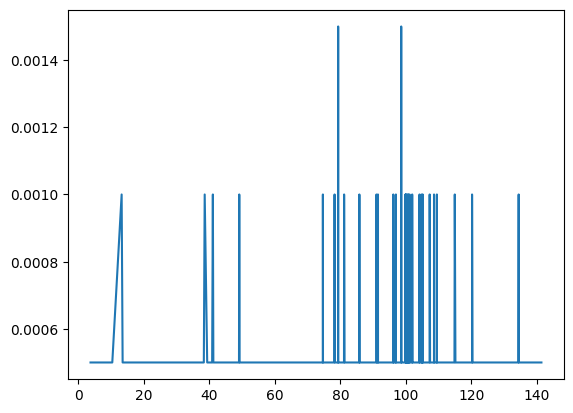

In [28]:
plt.plot(velocidade_escalar['velocidade escalar'],velocidade_escalar['frequencia percentual'])